In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('/content/creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.duplicated().sum()

1081

In [5]:
df = df.drop_duplicates()

In [ ]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df = df.drop('Time', axis=1)

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
column_stats = df.describe().loc[['mean', 'std']]

std_threshold = 1.0  #threshold for standardization
minmax_threshold = 0.05  #threshold for normalization

columns_to_standardize = []
columns_to_normalize = []

for column in df.columns:
    mean = column_stats[column]['mean']
    std = column_stats[column]['std']

    if std > std_threshold:
        columns_to_standardize.append(column)
    if np.abs(mean) > minmax_threshold:
        columns_to_normalize.append(column)

print("Columns to standardize:", columns_to_standardize)
print("Columns to normalize:", columns_to_normalize)


Columns to standardize: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'Amount']
Columns to normalize: ['Amount']


In [8]:
# Normalize and standardize the selected columns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
for column in columns_to_normalize:
    scaler = MinMaxScaler()
    df[column] = scaler.fit_transform(df[[column]])

for column in columns_to_standardize:
    scaler = StandardScaler()
    df[column] = scaler.fit_transform(df[[column]])


In [ ]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.701082,-0.041687,1.680101,0.976623,-0.247020,0.348012,0.193700,0.084434,0.333534,0.085688,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,0.608792,0.164138,0.109279,0.318998,0.042258,-0.060980,-0.065656,0.072903,-0.231703,-0.153784,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-0.700336,-0.811337,1.174270,0.270648,-0.366756,1.352655,0.643223,0.210788,-1.381169,0.194242,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-0.499064,-0.109972,1.187383,-0.608355,-0.008814,0.937245,0.192079,0.320843,-1.264664,-0.049713,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-0.597606,0.535539,1.025470,0.287092,-0.297036,0.072873,0.481517,-0.228725,0.747917,0.700958,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0


In [9]:
!pip install pandas scikit-learn imbalanced-learn


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import average_precision_score, precision_recall_curve, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [13]:
# Assuming you have already loaded and preprocessed your dataset into 'df'
X = df.drop('Class', axis=1)
y = df['Class']

# Initialize the SMOTE object
smote = SMOTE(random_state=42)

# Resample the data to balance the class labels
X_resampled, y_resampled = smote.fit_resample(X, y)



In [14]:
# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)



Random forest

AUPRC: 0.9998416830847171
Precision: 0.9998416830847171
Recall: 1.0
F1-score: 0.999920835275801


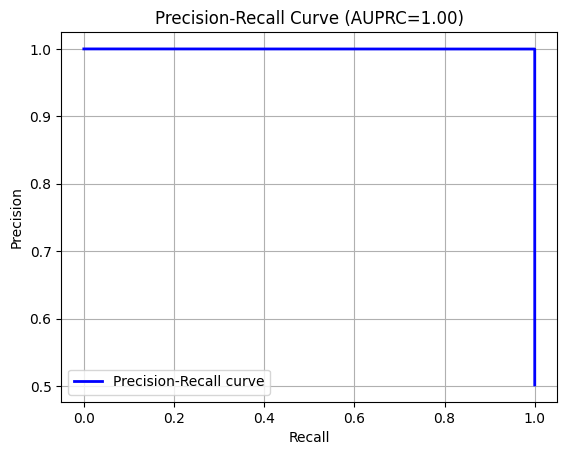

In [18]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate AUPRC (Area Under the Precision-Recall Curve)
auprc = average_precision_score(y_test, y_pred)
print("AUPRC:", auprc)

# Get precision-recall curve values
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Calculate precision, recall, and F1-score
precision_score_value = precision_score(y_test, y_pred)
recall_score_value = recall_score(y_test, y_pred)
f1_score_value = f1_score(y_test, y_pred)

print("Precision:", precision_score_value)
print("Recall:", recall_score_value)
print("F1-score:", f1_score_value)

# Plot the Precision-Recall curve
plt.plot(recall, precision, color='b', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (AUPRC={:.2f})'.format(auprc))
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


Logistic Regression

AUPRC: 0.9317901663249386
Precision: 0.9719890050300117
Recall: 0.9145305160189307
F1-score: 0.9423847422904693


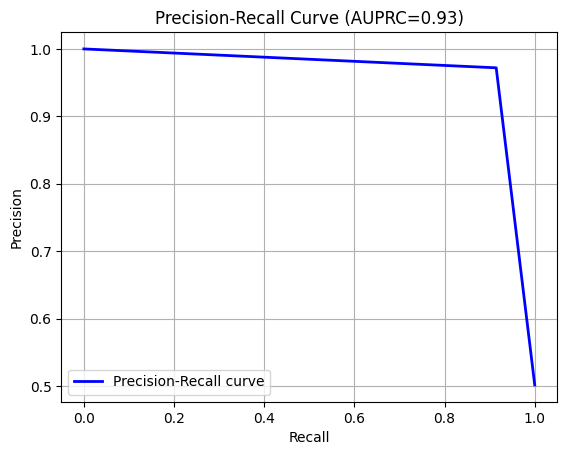

In [17]:
# Initialize the Logistic Regression classifier
logreg_classifier = LogisticRegression(random_state=42)

# Train the classifier on the training data
logreg_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg_classifier.predict(X_test)

# Calculate AUPRC (Area Under the Precision-Recall Curve)
auprc = average_precision_score(y_test, y_pred)
print("AUPRC:", auprc)
# Get precision-recall curve values
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Calculate precision, recall, and F1-score
precision_score_value = precision_score(y_test, y_pred)
recall_score_value = recall_score(y_test, y_pred)
f1_score_value = f1_score(y_test, y_pred)

print("Precision:", precision_score_value)
print("Recall:", recall_score_value)
print("F1-score:", f1_score_value)

# Plot the Precision-Recall curve
plt.plot(recall, precision, color='b', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (AUPRC={:.2f})'.format(auprc))
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

K-NEAREST NEIGHBOURS

AUPRC: 0.998015873015873
Precision: 0.9998416830847171
Recall: 1.0
F1-score: 0.999920835275801


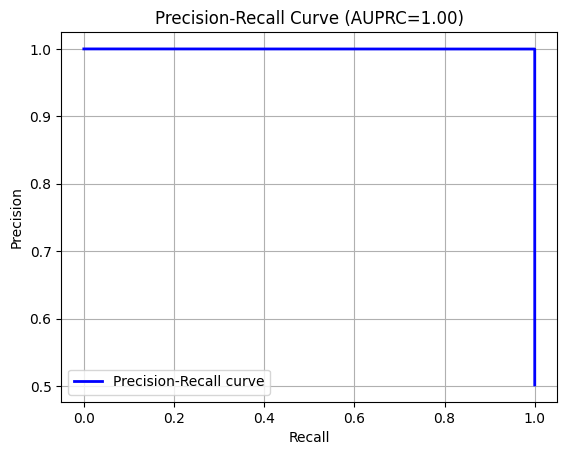

In [19]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

# Calculate AUPRC (Area Under the Precision-Recall Curve)
auprc = average_precision_score(y_test, y_pred)
print("AUPRC:", auprc)
print("Precision:", precision_score_value)
print("Recall:", recall_score_value)
print("F1-score:", f1_score_value)

# Plot the Precision-Recall curve
plt.plot(recall, precision, color='b', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (AUPRC={:.2f})'.format(auprc))
plt.legend(loc='lower left')
plt.grid(True)
plt.show()